<a href="https://colab.research.google.com/github/EsraaMosaad/Practice_NLP/blob/main/NLP_TASK2_NFA_TO_DFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pygraphviz as pgv
from IPython.display import Image, display
import re
from PIL import Image

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

if n=1 --->0010**1** ,10000**1**





In [121]:
NFA_4= {
"('q0', 0)": ['q0'],
"('q0', 1)": ['q0', 'q1'],
"('q1', 0)": ['q2'],
"('q1', 1)": ['q2'],
"('q2', 0)": ['q3'],
"('q2', 1)": ['q3'],
"('q3', 0)": ['q4'],
"('q3', 1)": ['q4'],
"('q4', 0)": [],
"('q4', 1)": [],
}

start_state = 'q0'
final_states_4 = ['q4']

NFA_2= {
"('q0', 0)": ['q0'],
"('q0', 1)": ['q0', 'q1'],
"('q1', 0)": ['q2'],
"('q1', 1)": ['q2'],
"('q2', 0)": [],
"('q2', 1)": [],
}

final_states_2 = ['q2']


# **convert from NFA to DFA**

In [63]:
def search(vals,keys):
  print("*****start search for not visited state*****")
  not_vistited=[]
  for val  in vals :
     s=" ".join(val)
    #  print(s,val,vals)
     found=0
     if f"('{s}', {0})" and f"('{s}', {1})" in keys:
         found=1
         print(f"found ({s}) in DFA keys {keys}")

     else: 
         not_vistited.append(s)
         print(f"not found ({s})in DFA keys {keys}")

  print("###############################################")     
  return not_vistited 

In [34]:
def get_next_state(DFA,NFA,state):
  for i in range(2):
      l=[]
      for x in state.split(" "):
        current_state=f"('{x}', {i})"
        print(f"{i} -->x={x}, current_state={current_state}")
        result=" ".join(NFA[current_state])
        print(f"result from nfa for state {current_state} :",result)
        if result=="":
          print("phi result")
        else:
          l.append(result)
      DFA[f"('{state}', {i})"]=[" ".join(l)]
      print("result add to dfa",l)
  return DFA


In [35]:
def NFA_To_DFA(NFA, start_state, final_states):
  DFA={}
  not_in_dfa=[start_state]
  # state not visit
  while len(not_in_dfa)>0:
      print(f"*****************current state-->{not_in_dfa[0]}*************")
      DFA=get_next_state(DFA,NFA,not_in_dfa[0])
      del not_in_dfa[0]
      # search for not visited state in dfa
      key=list(DFA.keys())
      val=list(DFA.values())
      not_vistited=search(val,key)
      not_in_dfa =not_in_dfa+not_vistited
      print(f"state not visited-->",not_in_dfa)
      
  
  print("###########################################")

  #get list of state and list of final state
  final_states_dfa=[]
  all_state_dfa=[]
  for final in final_states:
     for s in list(DFA.keys()):
       all_state_dfa.append(s.split("'")[1])
       if final in s:
         final_states_dfa.append(s.split("'")[1])
  #make list unique without duplicated       
  final_states_dfa=list(np.unique(final_states_dfa))
  all_state_dfa=list(np.unique(all_state_dfa))

  return DFA,all_state_dfa,final_states_dfa
   

In [122]:
dfa,all_state_dfa,final_states_dfa=NFA_To_DFA(NFA_4, start_state, final_states_4)

Streaming output truncated to the last 5000 lines.
1 -->x=q0, current_state=('q0', 1)
result from nfa for state ('q0', 1) : q0 q1
1 -->x=q1, current_state=('q1', 1)
result from nfa for state ('q1', 1) : q2
1 -->x=q3, current_state=('q3', 1)
result from nfa for state ('q3', 1) : q4
1 -->x=q4, current_state=('q4', 1)
result from nfa for state ('q4', 1) : 
phi result
result add to dfa ['q0 q1', 'q2', 'q4']
*****start search for not visited state*****
found (q0) in DFA keys ["('q0', 0)", "('q0', 1)", "('q0 q1', 0)", "('q0 q1', 1)", "('q0 q2', 0)", "('q0 q2', 1)", "('q0 q1 q2', 0)", "('q0 q1 q2', 1)", "('q0 q3', 0)", "('q0 q3', 1)", "('q0 q1 q3', 0)", "('q0 q1 q3', 1)", "('q0 q2 q3', 0)", "('q0 q2 q3', 1)", "('q0 q1 q2 q3', 0)", "('q0 q1 q2 q3', 1)", "('q0 q4', 0)", "('q0 q4', 1)", "('q0 q1 q4', 0)", "('q0 q1 q4', 1)", "('q0 q2 q4', 0)", "('q0 q2 q4', 1)", "('q0 q1 q2 q4', 0)", "('q0 q1 q2 q4', 1)", "('q0 q3 q4', 0)", "('q0 q3 q4', 1)", "('q0 q1 q3 q4', 0)", "('q0 q1 q3 q4', 1)"]
found (q0 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



found (q0 q3) in DFA keys ["('q0', 0)", "('q0', 1)", "('q0 q1', 0)", "('q0 q1', 1)", "('q0 q2', 0)", "('q0 q2', 1)", "('q0 q1 q2', 0)", "('q0 q1 q2', 1)", "('q0 q3', 0)", "('q0 q3', 1)", "('q0 q1 q3', 0)", "('q0 q1 q3', 1)", "('q0 q2 q3', 0)", "('q0 q2 q3', 1)", "('q0 q1 q2 q3', 0)", "('q0 q1 q2 q3', 1)", "('q0 q4', 0)", "('q0 q4', 1)", "('q0 q1 q4', 0)", "('q0 q1 q4', 1)", "('q0 q2 q4', 0)", "('q0 q2 q4', 1)", "('q0 q1 q2 q4', 0)", "('q0 q1 q2 q4', 1)", "('q0 q3 q4', 0)", "('q0 q3 q4', 1)", "('q0 q1 q3 q4', 0)", "('q0 q1 q3 q4', 1)", "('q0 q2 q3 q4', 0)", "('q0 q2 q3 q4', 1)", "('q0 q1 q2 q3 q4', 0)", "('q0 q1 q2 q3 q4', 1)"]
found (q0 q1 q3) in DFA keys ["('q0', 0)", "('q0', 1)", "('q0 q1', 0)", "('q0 q1', 1)", "('q0 q2', 0)", "('q0 q2', 1)", "('q0 q1 q2', 0)", "('q0 q1 q2', 1)", "('q0 q3', 0)", "('q0 q3', 1)", "('q0 q1 q3', 0)", "('q0 q1 q3', 1)", "('q0 q2 q3', 0)", "('q0 q2 q3', 1)", "('q0 q1 q2 q3', 0)", "('q0 q1 q2 q3', 1)", "('q0 q4', 0)", "('q0 q4', 1)", "('q0 q1 q4', 0)", "('q

In [123]:
dfa

{"('q0', 0)": ['q0'],
 "('q0', 1)": ['q0 q1'],
 "('q0 q1', 0)": ['q0 q2'],
 "('q0 q1', 1)": ['q0 q1 q2'],
 "('q0 q2', 0)": ['q0 q3'],
 "('q0 q2', 1)": ['q0 q1 q3'],
 "('q0 q1 q2', 0)": ['q0 q2 q3'],
 "('q0 q1 q2', 1)": ['q0 q1 q2 q3'],
 "('q0 q3', 0)": ['q0 q4'],
 "('q0 q3', 1)": ['q0 q1 q4'],
 "('q0 q1 q3', 0)": ['q0 q2 q4'],
 "('q0 q1 q3', 1)": ['q0 q1 q2 q4'],
 "('q0 q2 q3', 0)": ['q0 q3 q4'],
 "('q0 q2 q3', 1)": ['q0 q1 q3 q4'],
 "('q0 q1 q2 q3', 0)": ['q0 q2 q3 q4'],
 "('q0 q1 q2 q3', 1)": ['q0 q1 q2 q3 q4'],
 "('q0 q4', 0)": ['q0'],
 "('q0 q4', 1)": ['q0 q1'],
 "('q0 q1 q4', 0)": ['q0 q2'],
 "('q0 q1 q4', 1)": ['q0 q1 q2'],
 "('q0 q2 q4', 0)": ['q0 q3'],
 "('q0 q2 q4', 1)": ['q0 q1 q3'],
 "('q0 q1 q2 q4', 0)": ['q0 q2 q3'],
 "('q0 q1 q2 q4', 1)": ['q0 q1 q2 q3'],
 "('q0 q3 q4', 0)": ['q0 q4'],
 "('q0 q3 q4', 1)": ['q0 q1 q4'],
 "('q0 q1 q3 q4', 0)": ['q0 q2 q4'],
 "('q0 q1 q3 q4', 1)": ['q0 q1 q2 q4'],
 "('q0 q2 q3 q4', 0)": ['q0 q3 q4'],
 "('q0 q2 q3 q4', 1)": ['q0 q1 q3 q4'],
 

In [124]:
all_state_dfa

['q0',
 'q0 q1',
 'q0 q1 q2',
 'q0 q1 q2 q3',
 'q0 q1 q2 q3 q4',
 'q0 q1 q2 q4',
 'q0 q1 q3',
 'q0 q1 q3 q4',
 'q0 q1 q4',
 'q0 q2',
 'q0 q2 q3',
 'q0 q2 q3 q4',
 'q0 q2 q4',
 'q0 q3',
 'q0 q3 q4',
 'q0 q4']

In [128]:
final_states_dfa

['q0 q1 q2 q3 q4',
 'q0 q1 q2 q4',
 'q0 q1 q3 q4',
 'q0 q1 q4',
 'q0 q2 q3 q4',
 'q0 q2 q4',
 'q0 q3 q4',
 'q0 q4']

# **draws the DFA**

In [60]:
def draw_dfa(DFA, all_state_dfa, final_states):
    # Create a new graph
    G = pgv.AGraph(directed=True)

    for s in all_state_dfa:
      if s in final_states_dfa:
          # print(f"final state {s}")
          G.add_node(s, shape='doublecircle')
      else:
        # print(f"not final state {s}")
        G.add_node(s, shape='circle')
      

    for state in dfa:
      start=state.split("'")[1]
      index=state.split("'")[-1][2]
      for end in dfa[state]:
          #  print(f"edge({start},{end}) -->value {index}")
          G.add_edge(start, end, label=index)

    G.layout(prog='dot')
    # Draw the graph
    G.draw('dfa.png')

    # Display the image
    display(Image.open('dfa.png'))

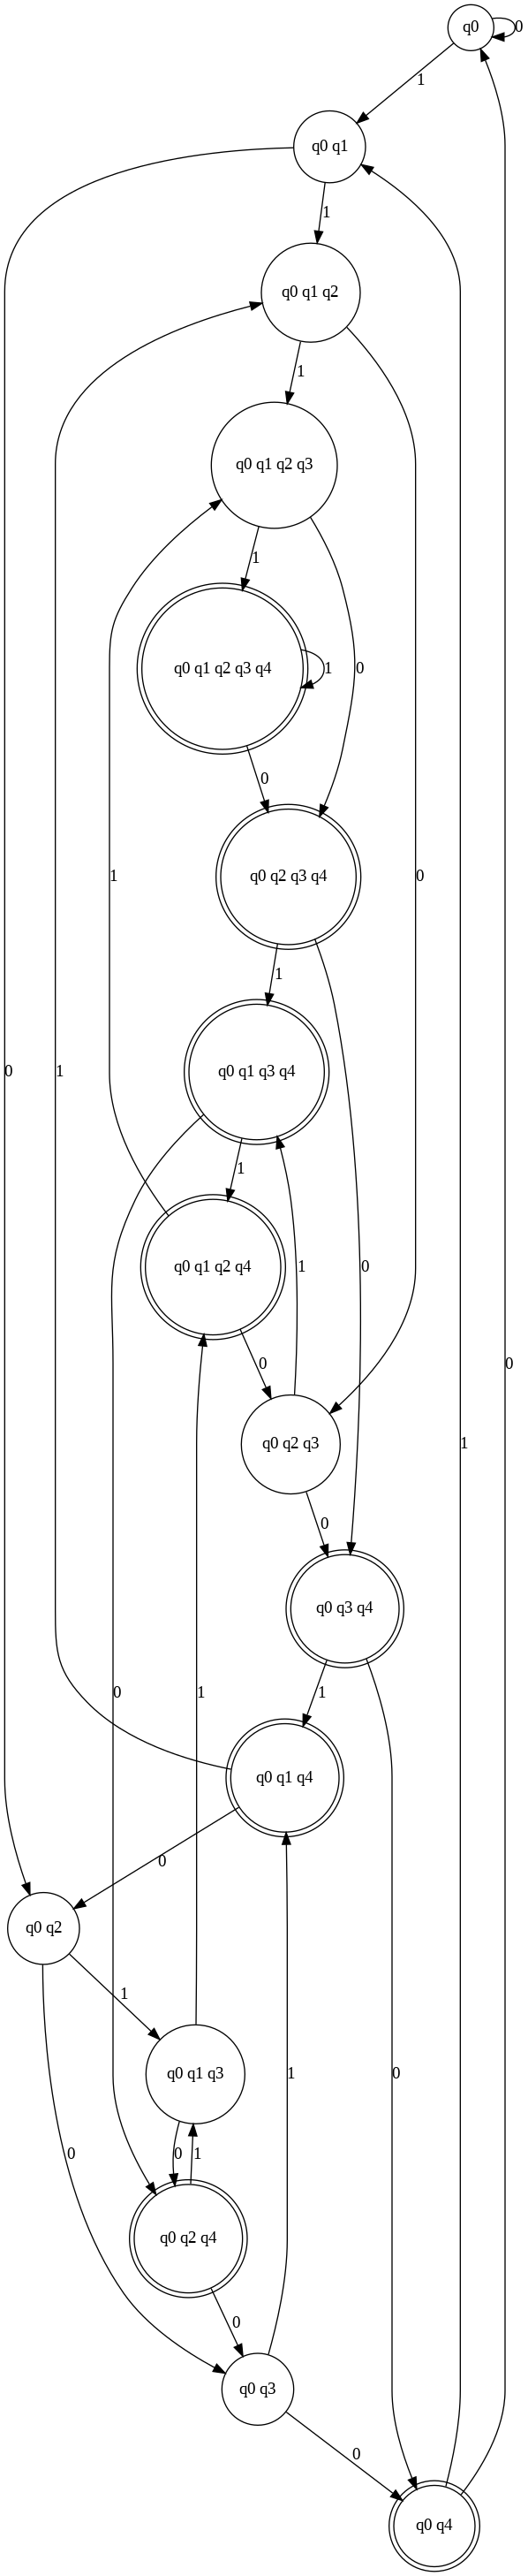

In [129]:
draw_dfa(dfa,all_state_dfa,final_states_dfa)

# **Find a string input that passes through all the states of the DFA (16 state)**

In [156]:
def find_string(dfa,all_state_dfa):
    num_symbols = 2
    visited={}
    for s in all_state_dfa:
        visited[s]=False
    input=[]
    print(visited)

    def dfs(state,prev_a):
        print("-->",state)
        visited[state] = True
        input.append((prev_a,state))
        if all(visited.values()):
            return True
        for symbol in range(num_symbols):
            next_state = " ".join(dfa[f"('{state}', {symbol})"])
            print(f"for symbol={symbol}",next_state ,visited[next_state])
            if not visited[next_state]:
                if dfs(next_state,symbol):

                    return True
        visited[state] = False
        input.pop()
        return False
    dfs('q0',"start")
    return input


In [157]:
input=find_string(dfa,all_state_dfa)

{'q0': False, 'q0 q1': False, 'q0 q1 q2': False, 'q0 q1 q2 q3': False, 'q0 q1 q2 q3 q4': False, 'q0 q1 q2 q4': False, 'q0 q1 q3': False, 'q0 q1 q3 q4': False, 'q0 q1 q4': False, 'q0 q2': False, 'q0 q2 q3': False, 'q0 q2 q3 q4': False, 'q0 q2 q4': False, 'q0 q3': False, 'q0 q3 q4': False, 'q0 q4': False}
--> q0
for symbol=0 q0 True
for symbol=1 q0 q1 False
--> q0 q1
for symbol=0 q0 q2 False
--> q0 q2
for symbol=0 q0 q3 False
--> q0 q3
for symbol=0 q0 q4 False
--> q0 q4
for symbol=0 q0 True
for symbol=1 q0 q1 True
for symbol=1 q0 q1 q4 False
--> q0 q1 q4
for symbol=0 q0 q2 True
for symbol=1 q0 q1 q2 False
--> q0 q1 q2
for symbol=0 q0 q2 q3 False
--> q0 q2 q3
for symbol=0 q0 q3 q4 False
--> q0 q3 q4
for symbol=0 q0 q4 False
--> q0 q4
for symbol=0 q0 True
for symbol=1 q0 q1 True
for symbol=1 q0 q1 q4 True
for symbol=1 q0 q1 q3 q4 False
--> q0 q1 q3 q4
for symbol=0 q0 q2 q4 False
--> q0 q2 q4
for symbol=0 q0 q3 True
for symbol=1 q0 q1 q3 False
--> q0 q1 q3
for symbol=0 q0 q2 q4 True
for sym

In [158]:
input

[('start', 'q0'),
 (1, 'q0 q1'),
 (0, 'q0 q2'),
 (0, 'q0 q3'),
 (1, 'q0 q1 q4'),
 (1, 'q0 q1 q2'),
 (0, 'q0 q2 q3'),
 (1, 'q0 q1 q3 q4'),
 (0, 'q0 q2 q4'),
 (1, 'q0 q1 q3'),
 (1, 'q0 q1 q2 q4'),
 (1, 'q0 q1 q2 q3'),
 (1, 'q0 q1 q2 q3 q4'),
 (0, 'q0 q2 q3 q4'),
 (0, 'q0 q3 q4'),
 (0, 'q0 q4')]